<a href="https://colab.research.google.com/github/Anggaputradwi/b/blob/main/Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
#membaca data
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')
train_labels = pd.read_csv('train_labels.csv')
train_features.head(20)


,series,rating_avg,genres,pages,publication_type,publication_info,author_books,author_followers
0,True,3.95,"Christian Fiction,Christian,Fiction,Religion,F...",356 pages,Hardcover,"First published January 1, 2007",745,1926
1,True,4.36,"Romance,Contemporary Romance,Contemporary,Erot...",480 pages,ebook,"First published August 9, 2016",66,3380
2,False,2.97,Nonfiction,224 pages,Paperback,"First published January 1, 2007",21,9
3,True,3.99,"Romance,New Adult,Contemporary,High School,Fig...",300 pages,Kindle Edition,"First published March 17, 2014",33,6160
4,False,3.50,NaN,287 pages,Paperback,"First published September 1, 1994",292,377
5,True,3.97,"Fantasy,Fiction,Young Adult,Adventure,Science ...",238 pages,Paperback,"First published February 1, 2004",100,34.1k
6,True,3.59,"Science Fiction,Fiction,Space Opera,Robots,Cyb...",336 pages,Hardcover,"First published January 1, 2008",161,5612
7,False,4.20,"Nonfiction,Memoir,Biography,Audiobook,Biograph...",180 pages,Hardcover,"First published July 12, 2022",8,717
8,False,4.07,NaN,324 pages,Paperback,"First published April 22, 2009",39,27
9,False,4.07,"Art,Philosophy,Nonfiction",423 pages,Hardcover,"First published January 1, 1998",7,1


In [ ]:
# Menggabungkan data fitur dan label pada data training
train_data = pd.concat([train_features, train_labels], axis=1)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   series            17290 non-null  bool   
 1   rating_avg        17290 non-null  float64
 2   genres            16650 non-null  object 
 3   pages             17244 non-null  object 
 4   publication_type  17244 non-null  object 
 5   publication_info  17285 non-null  object 
 6   author_books      17290 non-null  object 
 7   author_followers  17290 non-null  object 
 8   votes             17290 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
# Memeriksa nilai-nilai unik dalam kolom pages
print(train_data['pages'].unique())
print(test_features['pages'].unique())


['356 pages' '480 pages' '224 pages' '300 pages' '287 pages' '238 pages'
 '336 pages' '180 pages' '324 pages' '423 pages' '197 pages' '512 pages'
 '482 pages' '385 pages' '32 pages' '90 pages' '272 pages' '290 pages'
 '448 pages' '432 pages' '192 pages' '240 pages' '384 pages' '256 pages'
 '322 pages' '359 pages' '254 pages' '294 pages' '337 pages' '250 pages'
 '318 pages' '389 pages' '576 pages' '304 pages' '145 pages' '352 pages'
 '1028 pages' '311 pages' '326 pages' '248 pages' '406 pages' 'ebook'
 '306 pages' '323 pages' '262 pages' '368 pages' '339 pages' '413 pages'
 '302 pages' '128 pages' 'Paperback' '528 pages' '314 pages' '462 pages'
 '387 pages' '316 pages' '244 pages' '243 pages' '72 pages' '736 pages'
 '410 pages' '194 pages' '425 pages' '357 pages' '756 pages' '42 pages'
 '288 pages' '186 pages' '394 pages' '436 pages' '416 pages' '144 pages'
 '400 pages' '213 pages' '569 pages' '1407 pages' '263 pages' '517 pages'
 '303 pages' '307 pages' '408 pages' '278 pages' '40 page

In [ ]:
# Fungsi untuk membersihkan dan mengubah kolom pages menjadi numerik
def clean_pages(pages):
    try:
        return int(pages.replace(' pages', '').strip())
    except (ValueError, AttributeError):
        return np.nan

# # Mengisi nilai NaN pada kolom pages dengan nilai median
# train_data['pages'].fillna(train_data['pages'].median(), inplace=True)
# test_features['pages'].fillna(test_features['pages'].median(), inplace=True)

# # Mengisi missing values pada kolom genres
# test_features['genres'] = test_features['genres'].fillna('')

# # Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
# label_encoder = LabelEncoder()
# train_data['genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted(x.split(','))))
# test_features['genres'] = test_features['genres'].apply(lambda x: ' '.join(sorted(x.split(','))))
# train_data['genres'] = label_encoder.fit_transform(train_data['genres'])
# test_features['genres'] = label_encoder.transform(test_features['genres'])
# train_data['publication_type'] = label_encoder.fit_transform(train_data['publication_type'])
# test_features['publication_type'] = label_encoder.transform(test_features['publication_type'])
# train_data['publication_info'] = label_encoder.fit_transform(train_data['publication_info'])
# test_features['publication_info'] = label_encoder.transform(test_features['publication_info'])


In [ ]:
# Membersihkan dan mengubah kolom pages
train_data['pages'] = train_data['pages'].apply(clean_pages)
test_features['pages'] = test_features['pages'].apply(clean_pages)

In [ ]:
# Mengisi nilai NaN pada kolom pages dengan nilai median
train_data['pages'].fillna(train_data['pages'].median(), inplace=True)
test_features['pages'].fillna(test_features['pages'].median(), inplace=True)

In [ ]:
# Mengisi missing values pada kolom genres
train_data['genres'] = train_data['genres'].fillna('')
test_features['genres'] = test_features['genres'].fillna('')

In [ ]:
# Memastikan semua nilai di kolom genres adalah string
train_data['genres'] = train_data['genres'].astype(str)
test_features['genres'] = test_features['genres'].astype(str)

In [ ]:
# Mengubah kolom genres menjadi string dan menggabungkan genre dalam string
def process_genres(genres):
    if isinstance(genres, str):
        return ' '.join(sorted(genres.split(',')))
    return ''

In [ ]:
train_data['genres'] = train_data['genres'].apply(process_genres)
test_features['genres'] = test_features['genres'].apply(process_genres)

In [ ]:
# Memastikan semua nilai di kolom publication_type dan publication_info adalah string
train_data['publication_type'] = train_data['publication_type'].astype(str).str.strip()
test_features['publication_type'] = test_features['publication_type'].astype(str).str.strip()
train_data['publication_info'] = train_data['publication_info'].astype(str).str.strip()
test_features['publication_info'] = test_features['publication_info'].astype(str).str.strip()

In [ ]:
# Mengisi nilai NaN pada kolom kategorikal dengan string kosong
train_data['publication_type'] = train_data['publication_type'].fillna('')
test_features['publication_type'] = test_features['publication_type'].fillna('')
train_data['publication_info'] = train_data['publication_info'].fillna('')
test_features['publication_info'] = test_features['publication_info'].fillna('')


In [ ]:
# Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
label_encoder_genres = LabelEncoder()
label_encoder_pub_type = LabelEncoder()
label_encoder_pub_info = LabelEncoder()

In [ ]:
# Melakukan fit dan transform pada data training
train_data['genres'] = label_encoder_genres.fit_transform(train_data['genres'])
train_data['publication_type'] = label_encoder_pub_type.fit_transform(train_data['publication_type'])
train_data['publication_info'] = label_encoder_pub_info.fit_transform(train_data['publication_info'])

In [ ]:
# Memastikan nilai kosong adalah salah satu kelas yang diketahui oleh encoder
empty_class = ''
if empty_class not in label_encoder_genres.classes_:
    label_encoder_genres.classes_ = np.append(label_encoder_genres.classes_, empty_class)
if empty_class not in label_encoder_pub_type.classes_:
    label_encoder_pub_type.classes_ = np.append(label_encoder_pub_type.classes_, empty_class)
if empty_class not in label_encoder_pub_info.classes_:
    label_encoder_pub_info.classes_ = np.append(label_encoder_pub_info.classes_, empty_class)

In [ ]:
# Memastikan tidak ada nilai yang tidak dikenal di data testing sebelum transformasi
test_features['genres'] = test_features['genres'].apply(lambda x: x if x in label_encoder_genres.classes_ else empty_class)
test_features['publication_type'] = test_features['publication_type'].apply(lambda x: x if x in label_encoder_pub_type.classes_ else empty_class)
test_features['publication_info'] = test_features['publication_info'].apply(lambda x: x if x in label_encoder_pub_info.classes_ else empty_class)

In [ ]:
# Mengisi nilai NaN atau tidak dikenal dengan string kosong
test_features['genres'] = test_features['genres'].fillna(empty_class).astype(str)
test_features['publication_type'] = test_features['publication_type'].fillna(empty_class).astype(str)
test_features['publication_info'] = test_features['publication_info'].fillna(empty_class).astype(str)

In [ ]:
# Melakukan transform pada data testing
test_features['genres'] = label_encoder_genres.transform(test_features['genres'])
test_features['publication_type'] = label_encoder_pub_type.transform(test_features['publication_type'])
test_features['publication_info'] = label_encoder_pub_info.transform(test_features['publication_info'])

In [ ]:
# Fungsi untuk menghapus 'k' dan mengonversi ke integer
def convert_followers(thousand):
    try:
        if 'k' in thousand:
            return int(float(thousand.replace('k', '')) * 1000)
        return int(thousand)
    except ValueError:
        return 0  # atau nilai default lainnya

In [ ]:
train_data['author_books'] = train_data['author_books'].apply(convert_followers)
train_data['author_followers'] = train_data['author_followers'].apply(convert_followers)

In [ ]:
# Mengubah kolom lainnya menjadi integer
train_data['series'] = train_data['series'].astype(int)
train_data['rating_avg'] = train_data['rating_avg'].astype(int)
train_data['author_books'] = train_data['author_books'].astype(int)
train_data['author_followers'] = train_data['author_followers'].astype(int)
train_data['votes'] = train_data['votes'].astype(int)

In [ ]:
test_features['author_books'] = test_features['author_books'].apply(convert_followers)
test_features['author_followers'] = test_features['author_followers'].apply(convert_followers)

In [ ]:
test_features['series'] = test_features['series'].astype(int)
test_features['rating_avg'] = test_features['rating_avg'].astype(int)
test_features['author_books'] = test_features['author_books'].astype(int)
test_features['author_followers'] = test_features['author_followers'].astype(int)

In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11527 entries, 0 to 11526
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11527 non-null  int64  
 1   series            11527 non-null  int64  
 2   rating_avg        11527 non-null  int64  
 3   genres            11527 non-null  int64  
 4   pages             11527 non-null  float64
 5   publication_type  11527 non-null  int64  
 6   publication_info  11527 non-null  int64  
 7   author_books      11527 non-null  int64  
 8   author_followers  11527 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 810.6 KB


In [ ]:
# Mengisi nilai NaN atau tidak dikenal dengan string kosong
test_features['genres'] = test_features['genres'].fillna('').astype(str)
test_features['publication_type'] = test_features['publication_type'].fillna('').astype(str)
test_features['publication_info'] = test_features['publication_info'].fillna('').astype(str)

In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11527 entries, 0 to 11526
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11527 non-null  int64  
 1   series            11527 non-null  int64  
 2   rating_avg        11527 non-null  int64  
 3   genres            11527 non-null  object 
 4   pages             11527 non-null  float64
 5   publication_type  11527 non-null  object 
 6   publication_info  11527 non-null  object 
 7   author_books      11527 non-null  int64  
 8   author_followers  11527 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 810.6+ KB


In [ ]:
X = train_data.drop(['votes'], axis=1)
y = train_data['votes']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 42650781.84636471


In [ ]:
X_test = test_features.drop(['ID'], axis=1)
predictions = model.predict(X_test)


In [ ]:
test_features['votes'] = predictions
test_features[['ID', 'votes']].to_csv('predictions.csv', index=False)

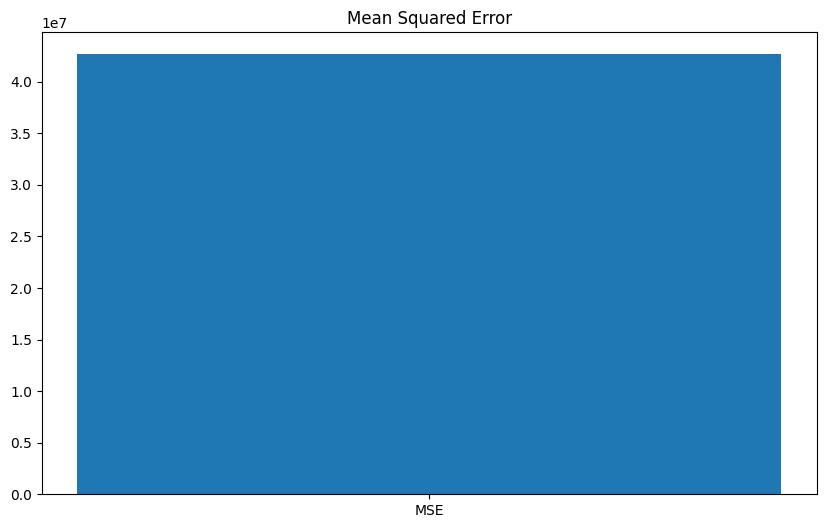

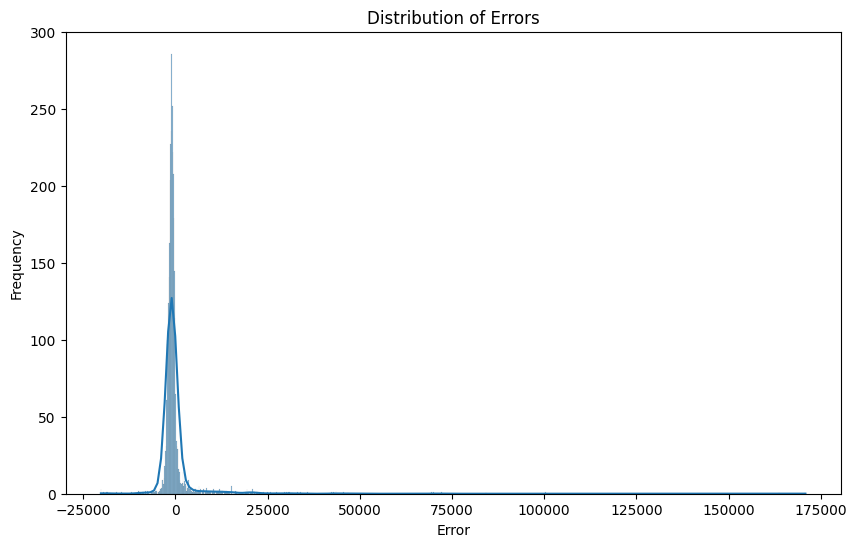

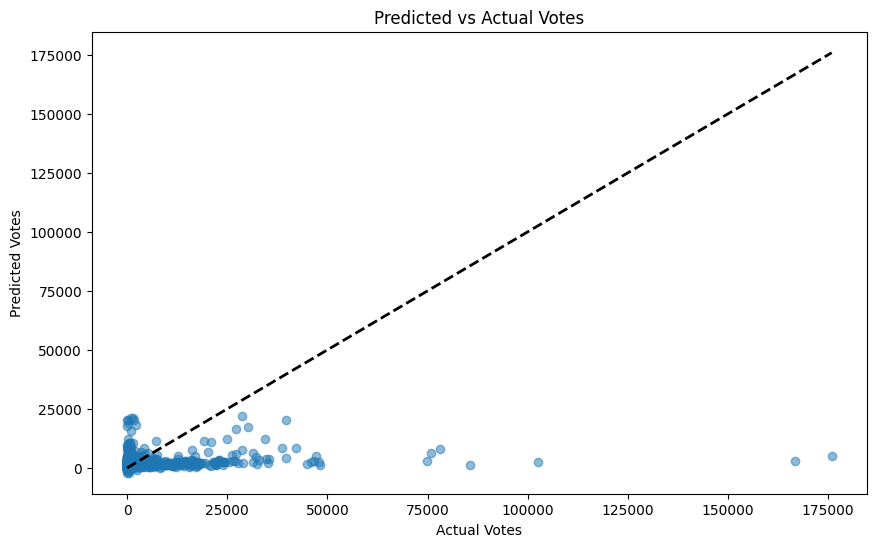

In [ ]:
# Mean Squared Error
plt.figure(figsize=(10, 6))
plt.title("Mean Squared Error")
plt.bar(['MSE'], [mse])
plt.show()

# Distribusi Error
errors = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title("Distribution of Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Prediksi vs Nilai Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.title("Predicted vs Actual Votes")
plt.show()


In [ ]:
df = pd.read_csv('/content/predictions.csv')
print(df)

          ID        votes
0       9868   802.996939
1      12913  1992.682720
2      25616  2652.649008
3      11623   850.228360
4      25214  2459.163474
...      ...          ...
11522  19280  1255.245099
11523  18184  2505.015653
11524  14766  1297.064199
11525  17585   998.891344
11526  19418  1539.402481

[11527 rows x 2 columns]
